Parametros para o trabalho

Algoritmo de Busca em Profundidade Limitada Iterativa para realizar busca não-informada nos problemas a seguir:

1. Mapa das cidades(a solução a ser encontrada deve ter a cidade Oradea como estado inicial e a cidade Hirsova como estado objetivo)

  Para que a sua entrega seja considerada suficiente para este problema, ela deverá:

  ● Implementar corretamente os algoritmos de Busca em Profundidade
  Limitada Iterativa e Busca em Profundidade Limitada (dica: basear sua
  implementação no código de Busca em Profundidade disponível no
  notebook da aula 3);

  ● Utilizar uma representação completa para os estados desse problema (dica:
  utilizar a mesma representação das implementações do notebook da aula 3);
  
  ● Encontrar uma solução do problema utilizando a quantidade correta de
  iterações (não é necessário encontrar a solução de menor custo);
  
  ● Ao encontrar a solução do problema, imprimir em ordem todas as cidades
  que pertencem à solução encontrada (partindo do estado inicial Oradea e
  chegando ao estado objetivo Hirsova) e o custo total da solução (a soma das
  distâncias entre as cidades da solução).


2. Mundo do aspirador( Para padronizar, a solução encontrada deve ter como estado inicial o estado em que os dois cômodos estão sujos e o aspirador está no cômodo da esquerda, e os dois estados objetivos são aqueles em que os dois cômodos estão limpos e o aspirador está no cômodo da direita ou da esquerda)
  Para que a sua entrega seja considerada suficiente para este problema, ela deverá:

  ● Implementar corretamente os algoritmos de Busca em Profundidade
  Limitada Iterativa e Busca em Profundidade Limitada (dica: basear sua
  implementação no código de Busca em Profundidade disponível no
  notebook da aula 3);

  ● Utilizar uma representação completa para os estados desse problema (dica:
  utilizar a mesma representação das implementações do notebook da aula 3);

  ● Encontrar uma solução do problema utilizando a quantidade correta de
  iterações;

  ● Ao encontrar a solução do problema, imprimir em ordem todas as ações que
  pertencem à solução encontrada (partindo do estado inicial e chegando a
  um estado objetivo) e o custo total da solução (considere que cada ação
  deste problema tem custo 1).


DFS limitada iterativa:
  funciona com Pilha(ultimo a entrar é o primeiro a sair)
  Define um L que será o limite de profundidade para acharmos o objetivo
  O L limite será expandido caso no achemos o Objetivo

In [1]:
#importar clases de pilha e lista
from queue import LifoQueue, Queue

In [2]:
#esta é a função que ira mostrar a solução encontrada pelo algoritmo 
def imprime_solucao(no, custo, antecessor):
  print ("\nSolucao encontrada\n Custo:", custo)     
  i = no
  solucao = []
  while i != '':
    solucao.append(i)
    i = antecessor[i]

  print(solucao[::-1], '\n')

### Mapa de cidades
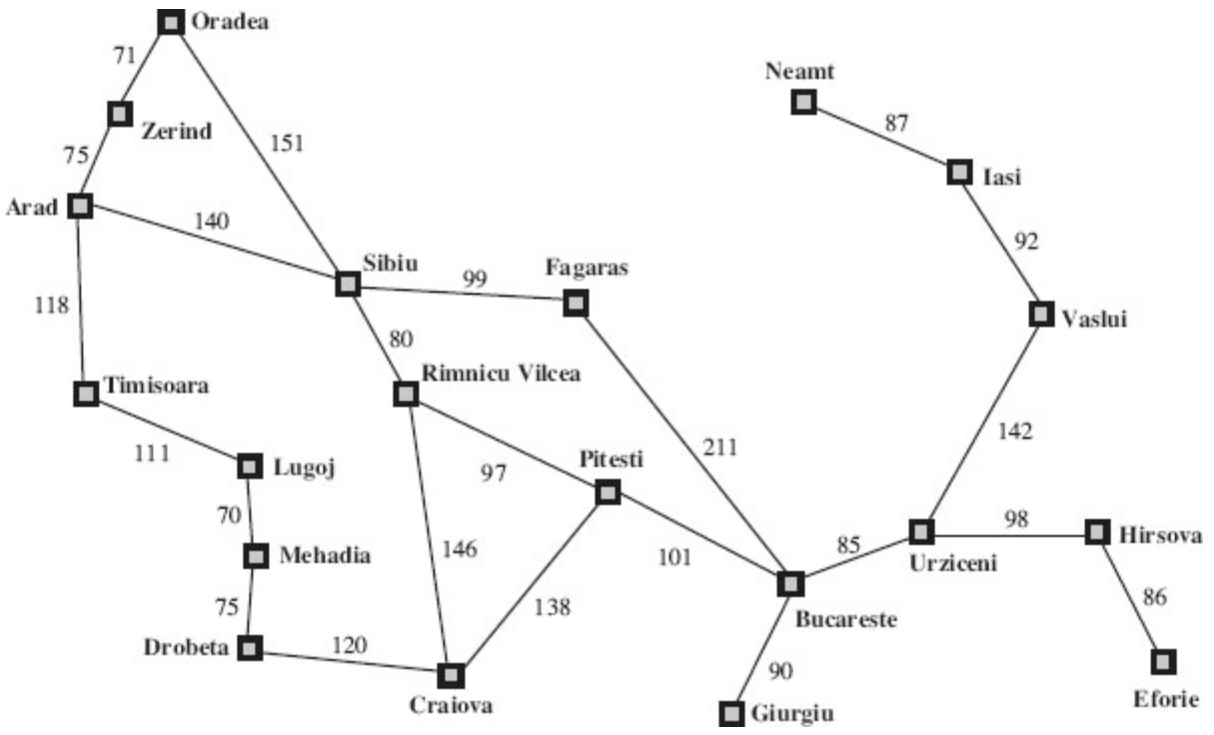

In [3]:
# Lista de adjacencia
# Cada cidade idica quais outras cidades possui ligação e distancia entre elas
cidades_vizinhas = {
    'Oradea': [(151, 'Sibiu'), (71, 'Zerind')],
    'Zerind': [(71, 'Oradea'), (75, 'Arad')],
    'Arad': [(75, 'Zerind'), (140, 'Sibiu'), (118, 'Timisoara')],
    'Timisoara': [(118, 'Arad'), (111, 'Lugoj')],
    'Lugoj': [(111, 'Timisoara'), (70, 'Mehadia')],
    'Mehadia': [(70, 'Lugoj'), (75, 'Drobeta')],
    'Drobeta': [(75, 'Mehadia'), (120, 'Craiova')],
    'Craiova': [(120, 'Drobeta'), (146, 'Rimnicu Vilcea'), (138, 'Pitesti')],
    'Rimnicu Vilcea': [(146, 'Craiova'), (80, 'Sibiu'), (97, 'Pitesti')],
    'Sibiu': [(80, 'Rimnicu Vilcea'), (140, 'Arad'), (151, 'Oradea'), (99, 'Fagaras')],
    'Pitesti': [(138, 'Craiova'), (97, 'Rimnicu Vilcea'), (101, 'Bucareste')],
    'Fagaras': [(99, 'Sibiu'), (211, 'Bucareste')],
    'Bucareste': [(211, 'Fagaras'), (101, 'Pitesti'), (90, 'Giurgiu'), (85, 'Urziceni')],
    'Giurgiu': [(90, 'Bucareste')],
    'Urziceni': [(85, 'Bucareste'), (98, 'Hirsova'), (142, 'Vaslui')],
    'Hirsova': [(98, 'Urziceni'), (86, 'Eforie')],
    'Eforie': [(86, 'Hirsova')],
    'Vaslui': [(142, 'Urziceni'), (92, 'Iasi')],
    'Iasi': [(92, 'Vaslui'), (87, 'Neamt')],
    'Neamt': [(87, 'Iasi')]
}

In [9]:
#definição da origem, do objetivo, definição do no, conjunto borda, conjunto explorado, conjunto antecessor, limite inicial e flag
#a solução a ser encontrada deve ter a cidade Oradea como estado inicial e a cidade Hirsova como estado objetivo


inicio = 'Oradea' #criei essa variavel inicio para ficar mais facil de testar
fim = 'Hirsova' #criei essa variavel fim para ficar mais facil de testar

no = (0, inicio) #define o no com custo e nome  #inicia o no

objetivo = [fim] #define objetivo

borda = LifoQueue() #inicia a borda como fila LIFO 
borda.put(no) #coloca o no de origem na borda

explorado = set() #instancia o conjunto explorado

antecessor = antecessor = {} #inicia a lista de antecessores vazia
antecessor[no[1]] = '' #defini que não tem antencessores

limite = 5 #Este sera o limite inicial de expansões da busca
flag = False #Esta sera a flag para ver se já achamos um resultado ou não

In [5]:
#função para contar os antecessores do no atual
def countAntecessor(no):
    i = no
    nAnt = 0
    while i != '':
        nAnt = nAnt + 1
        i = antecessor[i]
    return nAnt

In [10]:
#Para resolver a questão de contar o numero de interações feitas achei mais facil olhar o numero de antecessores de cada no(achei essa solução um pouco ruim pq vou descer e subir os nos em cada interação mas funciona então ta valendo)
#definir que caso o no tenha mais interações que o limite não iremos continiar a interagir com ele e nem com os nos filhos
#dessa forma a borda em dado momento ficara vazia e caso o limite de interações seja menor do que o maximo extipulado podemos recomeçar com um limite maior 


#eu coloquei tudo dentro de um laço de repetição só para eu não ter que ficar apertando executar varias vezes mas caso haja algum erro existe a chance do algoritmo ficar rodando e não parar
while flag == False: # o limite maximo dever algo entorno de 20
  if borda.empty() & limite > 20: #verifica se a borda está vazia e se o limite é muito alto ao ponto que ja deveia ter encontrado a solução
    print("falha")
    flag = True
    break
  elif borda.empty(): #verifica se a borda está vazia para aumentar o limite
    limite = limite + 2 #aumenta o limite
    print ("Expandindo  limite")
    #retomar a origem, zerar os antecessores, limpar a borda e o conjunto explorado
    no = (0, inicio) #define o no com custo, nome, n de expanção  #inicia o no
    borda = LifoQueue() #inicia a borda como fila LIFO 
    borda.put(no) #coloca o no de origem na borda

    explorado = set() #instancia o conjunto expplorado

    antecessor = antecessor = {} #inicia a lista de antecessores vazia
    antecessor[no[1]] = '' #defini que não tem antencessores
    nDeExpancoes = 0
  else:
    custo_caminho,no = borda.get() #pega o um no da borda
    explorado.add(no) #adiciona o no atual ao conjunto explorado
    print ("Explorado", no)
    nDeExpancoes = countAntecessor(no)#verifica o numero de expanções
    print (nDeExpancoes, 'nDeExpancoes')

    if(nDeExpancoes < limite): #verifica se o numero de expanções é menor que o limite
      for custo_acao,filho in cidades_vizinhas[no]: #laço para adicionar os nos filhos a borda
                if filho not in explorado and filho not in antecessor: #verifica se o filho não está no conjunto explorado e caso o filho já esteja na borda ele não sera adicionad novamente          antecessor[filho] = no
          if filho in objetivo: #caso filho seja objetivo achamos a solução
            flag=True
            imprime_solucao(filho, custo_caminho + custo_acao, antecessor)
          if flag == False: #caso filho não seja objetivo adiconamos ele a borda
            borda.put((custo_caminho + custo_acao, filho))
            print (filho, 'adicionado na borda')

Explorado Neamt
Numero de Expancão :  1
Iasi adicionado na borda
Explorado Iasi
Numero de Expancão :  2
Vaslui adicionado na borda
Explorado Vaslui
Numero de Expancão :  3
Urziceni adicionado na borda
Explorado Urziceni
Numero de Expancão :  4
Bucareste adicionado na borda
Hirsova adicionado na borda
Explorado Hirsova
Numero de Expancão :  5
Explorado Bucareste
Numero de Expancão :  5
Expandindo  limite
Explorado Neamt
Numero de Expancão :  1
Iasi adicionado na borda
Explorado Iasi
Numero de Expancão :  2
Vaslui adicionado na borda
Explorado Vaslui
Numero de Expancão :  3
Urziceni adicionado na borda
Explorado Urziceni
Numero de Expancão :  4
Bucareste adicionado na borda
Hirsova adicionado na borda
Explorado Hirsova
Numero de Expancão :  5
Eforie adicionado na borda
Explorado Eforie
Numero de Expancão :  6
Explorado Bucareste
Numero de Expancão :  5
Fagaras adicionado na borda
Pitesti adicionado na borda
Giurgiu adicionado na borda
Explorado Giurgiu
Numero de Expancão :  6
Explorado P

### Mundo do aspirador
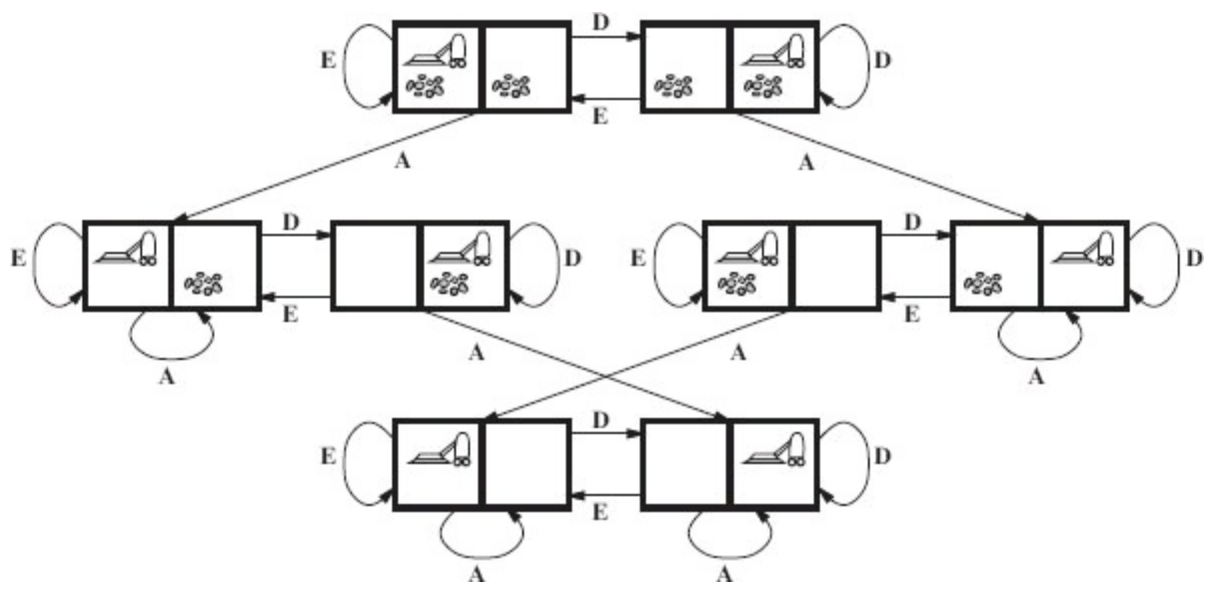

In [3]:
# ( posicao_do_aspirador , sujeira_na_esquerda? , sujeira_na_direita? )

def acoes(no):
  filhos = []
  if no[0] == 'E':
    filhos.append(('E', False, no[2])) # aspirar
    filhos.append(('D', no[1], no[2])) # mover para a direita
    filhos.append(('E', no[1], no[2])) # mover para a esquerda
  else:
    filhos.append(('D', no[1], False)) # aspirar
    filhos.append(('D', no[1], no[2])) # mover para a direita
    filhos.append(('E', no[1], no[2])) # mover para a esquerda
  return filhos

Busca em profundidade

In [34]:
#definição da origem, do objetivo, definição do no, conjunto borda, conjunto explorado, conjunto antecessor, limite inicial e flag
#a solução encontrada deve ter como estado inicial o estado em que os dois cômodos estão sujos e o aspirador está no cômodo da esquerda, e os dois estados objetivos são aqueles em que os dois cômodos estão limpos e o aspirador está no cômodo da direita ou da esquerda

no = (0, ('D', True, True)) #define o no com custo e nome  #inicia o no
objetivo = [('E', False, False), ('D', False, False)] #define objetivo


borda = LifoQueue() #inicia a borda como fila LIFO 
borda.put(no) #coloca o no de origem na borda

explorado = set() #instancia o conjunto explorado

antecessor = antecessor = {} #inicia a lista de antecessores vazia
antecessor[no[1]] = '' #defini que não tem antencessores


limite = 2 #Este sera o limite inicial de expansões da busca
flag = False #Esta sera a flag para ver se já achamos um resultado ou não

In [16]:
#função para contar os antecessores do no atual
def countAntecessor(no):
    i = no
    nAnt = 0
    while i != '':
        nAnt = nAnt + 1
        i = antecessor[i]
    return nAnt

In [35]:
while flag == False: # o limite maximo dever algo entorno de 20
  if borda.empty() & limite > 9: #verifica se a borda está vazia e se o limite é muito alto ao ponto que ja deveia ter encontrado a solução
    print("falha")
    flag = True
    #break
  elif borda.empty(): #verifica se a borda está vazia para aumentar o limite
    print ("Expandindo  limite")
    no = (0, ('D', True, True)) #define o no com custo e nome  #inicia o no
    borda = LifoQueue() #inicia a borda como fila LIFO 
    borda.put(no) #coloca o no de origem na borda
    explorado = set() #instancia o conjunto explorado
    antecessor = antecessor = {} #inicia a lista de antecessores vazia
    antecessor[no[1]] = '' #defini que não tem antencessores
    limite = limite + 1 #Aumentando o limite de expansões da busca
  else:
    custo_caminho,no = borda.get() #pega o um no da borda
    explorado.add(no) #adiciona o no atual ao conjunto explorado
    print (no, 'explorado')
    nDeExpancoes = countAntecessor(no)#verifica o numero de expanções
    print (nDeExpancoes, 'nDeExpancoes')

    if(nDeExpancoes < limite): #verifica se o numero de expanções é menor que o limite
      for filho in acoes(no):
                if filho not in explorado and filho not in antecessor: #verifica se o filho não está no conjunto explorado e caso o filho já esteja na borda ele não sera adicionad novamente
          antecessor[filho] = no
          
          if filho in objetivo: #caso filho seja objetivo achamos a solução
            flag = True
            imprime_solucao(filho, custo_caminho + 1, antecessor)
          if flag == False: #caso filho não seja objetivo adiconamos ele a borda
            borda.put((custo_caminho + 1, filho))
            print (filho, 'adicionado na borda')

('D', True, True) explorado
1 nDeExpancoes
('D', True, False) adicionado na borda
('E', True, True) adicionado na borda
('E', True, True) explorado
2 nDeExpancoes
('D', True, False) explorado
2 nDeExpancoes
Expandindo  limite
('D', True, True) explorado
1 nDeExpancoes
('D', True, False) adicionado na borda
('E', True, True) adicionado na borda
('E', True, True) explorado
2 nDeExpancoes
('E', False, True) adicionado na borda
('E', False, True) explorado
3 nDeExpancoes
('D', True, False) explorado
2 nDeExpancoes
('E', True, False) adicionado na borda
('E', True, False) explorado
3 nDeExpancoes
Expandindo  limite
('D', True, True) explorado
1 nDeExpancoes
('D', True, False) adicionado na borda
('E', True, True) adicionado na borda
('E', True, True) explorado
2 nDeExpancoes
('E', False, True) adicionado na borda
('E', False, True) explorado
3 nDeExpancoes
('D', False, True) adicionado na borda
('D', False, True) explorado
4 nDeExpancoes
('D', True, False) explorado
2 nDeExpancoes
('E', Tru